<a href="https://colab.research.google.com/github/Rakin003/Rakin_Code_Workshop/blob/main/Resnet50_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Saving newhampshire_AugRes_002.png to newhampshire_AugRes_002.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


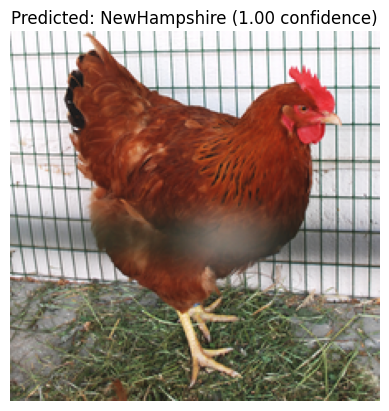

Predicted class: NewHampshire
Confidence: 0.9984


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Load your ResNet50 model
model = load_model('/content/drive/MyDrive/chicken_dataset/chicken_breed_classifier_ResNet50.h5')

# Define class labels (same order as training)
class_labels = ['Bielefelder', 'Blackorpington', 'Brahma', 'Buckeye', 'Fayoumi',
                'Leghorn', 'NewHampshire', 'PlymouthRock', 'Sussex', 'Turken']

# Upload an image from your local computer
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # For ResNet50

# Predict
pred_probs = model.predict(img_array)
pred_index = np.argmax(pred_probs[0])
pred_label = class_labels[pred_index]
confidence = np.max(pred_probs[0])

# Show the result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {pred_label} ({confidence:.2f} confidence)")
plt.show()

# Print result
print(f"Predicted class: {pred_label}")
print(f"Confidence: {confidence:.4f}")
